# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [15]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

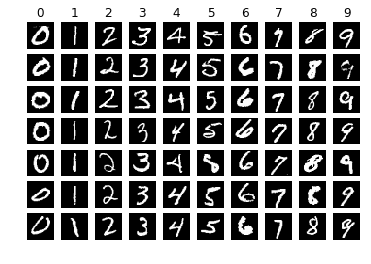

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [25]:
# 让标签变成0/1
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) # 这里已经补过一个1了
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [26]:
# 这里用整体标准化效果会更好
# P.S.其实不标准化效果最好
X_train_feats = (X_train - np.mean(X_train))/ np.std(X_train) # choose and extract features
X_test_feats = (X_test - np.mean(X_test))/ np.std(X_test) # choose and extract features

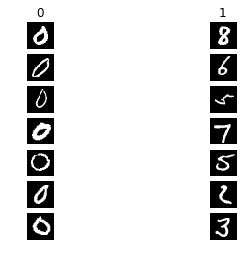

In [23]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [27]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.686450
iteration 100 / 500: loss 0.167030
iteration 200 / 500: loss 0.149143
iteration 300 / 500: loss 0.180037
iteration 400 / 500: loss 0.299215


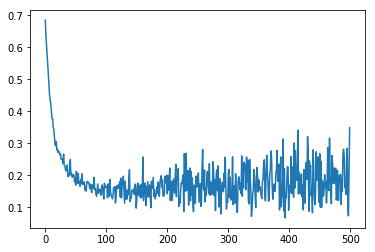

In [8]:
plt.plot(loss_history)

In [9]:
y_test_pred = classifier.predict(X_test_feats)
print ("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.9760714285714286


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [10]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########

TP, FP, FN, TN = 0, 0, 0, 0
precision, recall = 0, 0
for i in range(len(y_test)):
    if(y_test[i] == 0 and y_test_pred[i] == 0):
        TP += 1
    elif(y_test[i] == 1 and y_test_pred[i] == 1):
        TN += 1
    elif(y_test[i] == 0 and y_test_pred[i] == 1):
        FN += 1
    else:
        FP += 1

precision = TP / (float(TP + FP))
recall = TP/ (float(TP+FN))

print (precision)
print (recall)
print ('F1:', precision*recall*2/(precision+recall))

0.9670138888888888
0.7895109851169383
F1: 0.869293796332423


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [11]:
# 下面这个其实就是照抄得上面得
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) # 这里已经补过一个1了
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [12]:
# 这边作标准化处理
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) # choose and extract features
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) # choose and extract features
# X_train_feats = X_train
# X_test_feats = X_test

In [39]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.
# print(labels)
classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-6,
    num_iters = 100000,
    batch_size = 64,
)

[0 1 0 ... 0 1 0]
iteration 0 / 100000: loss 0.697414
iteration 10000 / 100000: loss 0.417836
iteration 20000 / 100000: loss 0.309433
iteration 30000 / 100000: loss 0.253504
iteration 40000 / 100000: loss 0.202220
iteration 50000 / 100000: loss 0.215569
iteration 60000 / 100000: loss 0.162881
iteration 70000 / 100000: loss 0.169896
iteration 80000 / 100000: loss 0.164427
iteration 90000 / 100000: loss 0.148672
[1 0 1 ... 1 0 1]
iteration 0 / 100000: loss 0.695944
iteration 10000 / 100000: loss 0.400840
iteration 20000 / 100000: loss 0.285072
iteration 30000 / 100000: loss 0.248109
iteration 40000 / 100000: loss 0.206002
iteration 50000 / 100000: loss 0.178802
iteration 60000 / 100000: loss 0.166049
iteration 70000 / 100000: loss 0.165996
iteration 80000 / 100000: loss 0.152983
iteration 90000 / 100000: loss 0.129774
[0 0 0 ... 0 0 0]
iteration 0 / 100000: loss 0.697306
iteration 10000 / 100000: loss 0.420415
iteration 20000 / 100000: loss 0.306255
iteration 30000 / 100000: loss 0.22750

In [43]:
# you may change your code in function `predict`
y_test_pred = classifier.predict_one_vs_all(X_test_feats)
print ("The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.12571428571428572
